# **Using CoreNLP with Python**

![Latest Version](https://img.shields.io/pypi/v/stanza.svg?colorB=bc4545)
![Python Versions](https://img.shields.io/pypi/pyversions/stanza.svg?colorB=bc4545)

We will use Stanza because it's the officially maintained library that lets us use Stanford's CoreNLP Java ☕ library using Python 🐍!

## **1. Connect to Google Drive**

The `Data Files` folder contains our Psalm & CCLI files and is located in Google Drive. We need access to it.

1. Upload the `Data Files` folder to your Google Drive.
2. Run the command below.
3. Open Files panel & make sure you can see & access the `Data Files` folder.
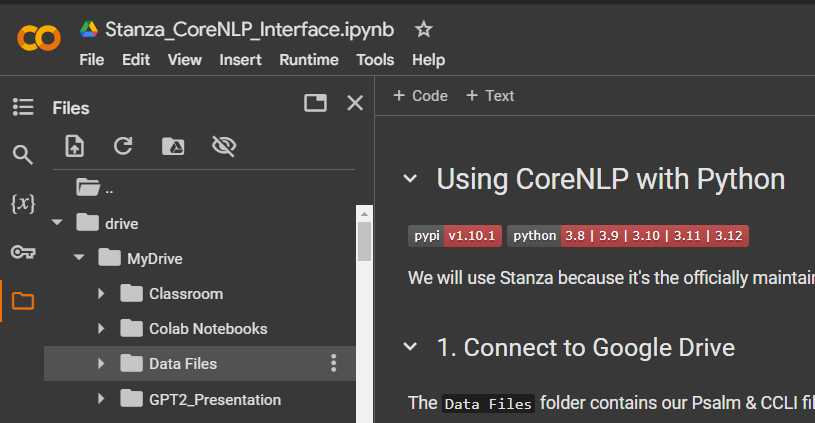


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Installation**

### 2.1. Install Python 3

If you're running this code locally, you must install Python 3 before continuing.

Since Colab already has Python 3 installed, we'll skip this step.

### 2.2. Installing Stanza

In [ ]:
# Install stanza (Only run if stanza is not yet installed. It should be installed here already!)
!pip install stanza

# Import stanza
import stanza
import os
import json
import time
from google.protobuf import json_format

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

### 2.3. Install Stanford CoreNLP

For Stanza to connect with the Stanford CoreNLP Java library, the library has to be installed and a `CORENLP_HOME` environment variable has to be pointed to the installation location.

In [ ]:
# Download the Stanford CoreNLP package with Stanza's installation command (Only run if stanza is not yet installed. It should be installed here already!)
# This'll take several minutes, depending on the network speed
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)

# Set the CORENLP_HOME environment variable to point to the installation location
# import os
os.environ["CORENLP_HOME"] = corenlp_dir

NameError: name 'stanza' is not defined

Look at the CoreNLP installation folder to make sure CoreNLP is installed.

If it is installed, we should see some .jar files!

In [ ]:
!ls $CORENLP_HOME

build.xml				  jollyday.jar
corenlp.sh				  LIBRARY-LICENSES
CoreNLP-to-HTML.xsl			  LICENSE.txt
ejml-core-0.39.jar			  Makefile
ejml-core-0.39-sources.jar		  patterns
ejml-ddense-0.39.jar			  pom-java-11.xml
ejml-ddense-0.39-sources.jar		  pom-java-17.xml
ejml-simple-0.39.jar			  pom.xml
ejml-simple-0.39-sources.jar		  protobuf-java-3.25.5.jar
input.txt				  protobuf-java-3.25.5-sources.jar
input.txt.out				  README.txt
input.txt.xml				  RESOURCE-LICENSES
istack-commons-runtime-3.0.7.jar	  sample-project-pom.xml
istack-commons-runtime-3.0.7-sources.jar  SemgrexDemo.java
jakarta.json-1.1.6.jar			  ShiftReduceDemo.java
jakarta.json-1.1.6-sources.jar		  slf4j-api.jar
jakarta.servlet-api-4.0.4.jar		  slf4j-simple.jar
jakarta.servlet-api-4.0.4-sources.jar	  stanford-corenlp-4.5.8.jar
javax.activation-api-1.2.0.jar		  stanford-corenlp-4.5.8-javadoc.jar
javax.activation-api-1.2.0-sources.jar	  stanford-corenlp-4.5.8-models.jar
jaxb-api-2.4.0-b180830.0359.jar		  stanford-corenlp-4.5.8-source

## **3. Annotating ("boiling") Text with CoreNLP Interface**

### 3.1. Constructing CoreNLPClient

At a high level, the CoreNLP Python interface works by first starting a background CoreNLP Java `server` process, and then creating a Python `client` instance.

The `client` will pass the text to "boil" to the background `server` process, and the `server` will send back the annotation (or "boiling") results.

Stanza nicely wraps both the `client` & `server` in the `CoreNLPClient` class, so let's import this class and create an instance of it.

In [ ]:
from stanza.server import CoreNLPClient

After importing, we create a `CoreNLPClient` instance. The constructor method takes a Python list of annotator names as argument.

For more options in creating the client instance, please refer to the [CoreNLP Client Options List](https://stanfordnlp.github.io/stanza/corenlp_client.html#corenlp-client-options).

First, choose which "boiling" method you'd like to use.

In [ ]:
# Select the boiling method (1-6).
boiling_method = 5

In [ ]:
# Automatically generate the appropriate annotators.
my_annotators = []
if boiling_method == 0: # All (Do not use. The output text will become too long for CoreNLP)
    my_annotators = ['tokenize','ssplit','lemma','ner','depparse','coref','sentiment']
elif boiling_method == 1: # Lexical Analysis
    my_annotators = ['tokenize','lemma']
elif boiling_method == 2: # Sentiment Annotator
    my_annotators = ['tokenize','ssplit','sentiment']
elif boiling_method == 3: # Name Entity Recognition
    my_annotators = ['tokenize','ssplit','ner']
elif boiling_method == 4: # POS Tagging and Grammatical Structure
    my_annotators = ['tokenize','ssplit','pos', 'depparse']
elif boiling_method == 5: # Repetitiveness (N-grams)
    my_annotators = ['tokenize']
elif boiling_method == 6: # Coreference Resolution
    my_annotators = ['tokenize','ssplit','pos', 'lemma', 'ner', 'depparse', 'coref']
else:
    raise Exception("✖✖✖ Error: Invalid boiling method.")

my_properties = {
    'annotators': my_annotators,
    'ssplit.eolonly': 'true'
}

# Create a CoreNLPClient instance.
client = CoreNLPClient(
    properties=my_properties,
    memory='4G',
    endpoint='http://localhost:9001',
    timeout = 30000,
    be_quiet=True
    )

print(client)

NameError: name 'CoreNLPClient' is not defined

Let's start the `CoreNLPClient` instance that we created.

If you print the background processes, you should be able to find the Java CoreNLP server running.

In [ ]:
# If there is a current instance running, shut down the background CoreNLP server.
#client.stop()
#time.sleep(10)
#!ps -o pid,cmd | grep java

# If it just doesn't want to get shut down, kill the process on port 9001.
!kill $(lsof -t -i:9001)
!ps -o pid,cmd | grep java

# Start the background server and wait for some time (Optional, because by default the server will be started when the first annotation ("boiling") is performed).
client.start()
time.sleep(10)

# Check that our CoreNLP Client is running.
# Print background processes and look for "java" (We should see a StanfordCoreNLPServer java process running in the background).
!ps -o pid,cmd | grep java

kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
   3287 [java] <defunct>
   7782 [java] <defunct>
   9151 /bin/bash -c ps -o pid,cmd | grep java
   9153 grep java


INFO:stanza:Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 30000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-ac06c3b38c3543c6.props -preload -outputFormat serialized


   3287 [java] <defunct>
   7782 [java] <defunct>
   9154 java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -time
   9216 /bin/bash -c ps -o pid,cmd | grep java
   9218 grep java


### 3.2. Specifying the Directory and Files to "Boil"

In [ ]:
# Select the appropriate folder.
folder_name = "CCLI .txt files (Processed)"

# Select the files to be boiled.
file_names = []
for file in os.listdir(f"drive/MyDrive/Psalms_CCLI_Analysis/ccli-psalm-analysis-main/{folder_name}"):
  if file.endswith(".txt"):
    file_names.append(file)

print(len(file_names))

100


In [ ]:
# Automatically generate the appropriate directory paths.
in_folder_name = f"drive/MyDrive/Psalms_CCLI_Analysis/ccli-psalm-analysis-main/{folder_name}"
out_folder_name = f"drive/MyDrive/Psalms_CCLI_Analysis/Output2 Files/{folder_name}"

if not os.path.exists(out_folder_name):
    os.makedirs(out_folder_name)

### 3.3. "Boiling" the Text

To annotate ("boil") a piece of text, simply pass the text into `client.annotate()`.

After the "boiling", a `Document` object will be returned, containing our "boiling" results.

In [ ]:
num_files = len(file_names)

for file_name in file_names:

  file_path = os.path.join(in_folder_name, file_name)
  out_file_path = os.path.join(out_folder_name, file_name)

  file_content = ""
  try:

    with open(f"{file_path}", 'r', encoding="utf8") as in_file:
        for line in in_file.readlines():
            file_content += line
    print(f"➜ File loaded: {file_name}")

    result = client.annotate(file_content)
    print(f"𖤓 File boiled: {file_name}")

    with open(f"{out_file_path[:-4]}_{boiling_method}.json", "w") as out_file:
      result_json = json_format.MessageToDict(result)
      json.dump(result_json, out_file, indent=4)
    print(f"✔ File saved: {out_file_path[:-4]}_{boiling_method}.txt")

    print()


  except Exception as e:
    print(f"✖✖✖ Error: {e}")
    break

print("✔✔✔ Success! ✔✔✔")

➜ File loaded: Abide.txt
𖤓 File boiled: Abide.txt
✔ File saved: drive/MyDrive/Psalms_CCLI_Analysis/Output2 Files/CCLI .txt files (Processed)/Abide_2.txt

➜ File loaded: 10,000 Reasons (Bless The Lord).txt
𖤓 File boiled: 10,000 Reasons (Bless The Lord).txt
✔ File saved: drive/MyDrive/Psalms_CCLI_Analysis/Output2 Files/CCLI .txt files (Processed)/10,000 Reasons (Bless The Lord)_2.txt

➜ File loaded: Blessed Be Your Name.txt
𖤓 File boiled: Blessed Be Your Name.txt
✔ File saved: drive/MyDrive/Psalms_CCLI_Analysis/Output2 Files/CCLI .txt files (Processed)/Blessed Be Your Name_2.txt

➜ File loaded: Holy Holy Holy (Nicaea).txt
𖤓 File boiled: Holy Holy Holy (Nicaea).txt
✔ File saved: drive/MyDrive/Psalms_CCLI_Analysis/Output2 Files/CCLI .txt files (Processed)/Holy Holy Holy (Nicaea)_2.txt

➜ File loaded: Graves Into Gardens.txt
𖤓 File boiled: Graves Into Gardens.txt
✔ File saved: drive/MyDrive/Psalms_CCLI_Analysis/Output2 Files/CCLI .txt files (Processed)/Graves Into Gardens_2.txt

➜ File load

In [ ]:
# Next step:
# Wrap each document with a stanza.Document object (for bulk processing)
# input_files = [stanza.Document([], text=d) for d in files]

# # Call the neural pipeline on this list of documents
# out_docs = nlp(in_docs)

# # Show the first output document (output is a list of stanza.Document objects)
# print(out_docs[1])

# print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for doc in out_docs for sent in doc.sentences for word in sent.words], sep='\n')

# Iterate over all tokens in all sentences, and print out the word, lemma, pos and ner tags
# print("{:12s}\t{:12s}\t{:6s}\t{}".format("Word", "Lemma", "POS", "NER"))

# for doc in output_document:
# for i, sent in enumerate(result.sentence):
#     print("[Sentence {}]".format(i+1))
#     for t in sent.token:
#         print("{:12s}\t{:12s}\t{:6s}\t{}".format(t.word, t.lemma, t.pos, t.ner))
#     print("")

[Sentence 1]
When        	when        	WRB   	
the         	the         	DT    	
music       	music       	NN    	
fades       	fade        	VBZ   	
all         	all         	RB    	
is          	be          	VBZ   	
stripped    	strip       	VBN   	
away        	away        	RB    	

[Sentence 2]
And         	and         	CC    	
I           	I           	PRP   	
simply      	simply      	RB    	
come        	come        	VBP   	

[Sentence 3]
Longing     	longing     	NN    	
just        	just        	RB    	
to          	to          	TO    	
bring       	bring       	VB    	
something   	something   	NN    	
that        	that        	WDT   	
's          	be          	VBZ   	
of          	of          	IN    	
worth       	worth       	JJ    	

[Sentence 4]
That        	that        	DT    	
will        	will        	MD    	
bless       	bless       	VB    	
Your        	you         	PRP$  	
heart       	heart       	NN    	

[Sentence 5]
I           	I           	PRP   	
'll         	

### 3.4. Miscellaneous





*** NOTE:** Although in general "boiling"s are very fast, the first "boiling" might take a while to complete in the notebook. Please stay patient.

In [ ]:
# Iterate over all tokens in all sentences, and print out the word, lemma, pos and ner tags
print("{:12s}\t{:12s}\t{:6s}\t{}".format("Word", "Lemma", "POS", "NER"))

for doc in result:
  for i, sent in enumerate(doc.sentence):
      print("[Sentence {}]".format(i+1))
      for t in sent.token:
          print("{:12s}\t{:12s}\t{:6s}\t{}".format(t.word, t.lemma, t.pos, t.ner))
      print("")

Word        	Lemma       	POS   	NER
[Sentence 1]
'T          	't          	PRP   	
is          	be          	VBZ   	
so          	so          	RB    	
sweet       	sweet       	JJ    	
to          	to          	TO    	
trust       	trust       	VB    	
in          	in          	IN    	
Jesus       	Jesus       	NNP   	

[Sentence 2]
Just        	just        	RB    	
to          	to          	TO    	
take        	take        	VB    	
Him         	he          	PRP   	
at          	at          	IN    	
His         	he          	PRP$  	
word        	word        	NN    	

[Sentence 3]
Just        	just        	RB    	
to          	to          	TO    	
rest        	rest        	VB    	
upon        	upon        	IN    	
His         	he          	PRP$  	
promise     	promise     	NN    	

[Sentence 4]
Just        	just        	RB    	
to          	to          	TO    	
know        	know        	VB    	
thus        	thus        	RB    	
saith       	saith       	VB    	
the         	the        

Alternatively, you can also browse the NER results by iterating over entity mentions over the sentences. For example:

In [ ]:
# Iterate over all detected entity mentions
print("{:30s}\t{}".format("Mention", "Type"))

for sent in result.sentence:
    for m in sent.mentions:
        print("{:30s}\t{}".format(m.entityMentionText, m.entityType))

Mention                       	Type


NameError: name 'document' is not defined

To print all annotations a sentence, token or mention has, you can simply print the corresponding obejct.

In [ ]:
# Print annotations of a token
print(result.sentence[0].token[0])

# Print annotations of a mention
print(result.sentence[0].mentions[0])

word: "Let"
value: "Let"
before: ""
after: " "
originalText: "Let"
beginChar: 0
endChar: 3
tokenBeginIndex: 0
tokenEndIndex: 1
hasXmlContext: false
isNewline: false



IndexError: list index out of range